In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import random
import seaborn as sns

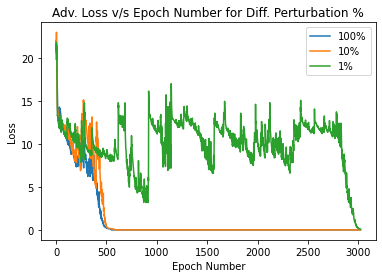

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('loss_vs_delta.csv')

# Get the number of rows in the DataFrame
num_rows = len(df)

# Plot each column on the y-axis against the epoch number on the x-axis
plt.plot(range(1, num_rows + 1), df['1'], label='100%')
plt.plot(range(1, num_rows + 1), df['0.1'], label='10%')
plt.plot(range(1, num_rows + 1), df['0.01'], label='1%')

# Add labels and title
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Adv. Loss v/s Epoch Number for Diff. Perturbation %')

# Add legend
plt.legend()

# Show the plot
plt.show()

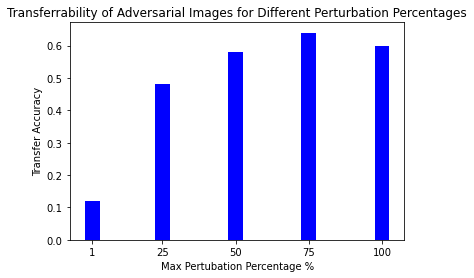

In [9]:
import matplotlib.pyplot as plt

# Data
perturbation_percentages = [1, 25, 50, 75, 100]
transfer_accuracy = [0.12, 0.48, 0.58, 0.64, 0.6]

# Plot transfer accuracy versus Max Perturbation Percentage
plt.bar(perturbation_percentages, transfer_accuracy, color='blue', width=5)

# Add labels and title
plt.xlabel('Max Pertubation Percentage %')
plt.ylabel('Transfer Accuracy')
plt.title('Transferrability of Adversarial Images for Different Perturbation Percentages')

plt.xticks(perturbation_percentages)

# Show the plot
plt.show()

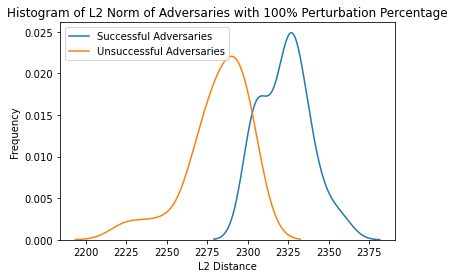

In [30]:
# Function to compute L2 distance between two images
def compute_l2_distance(img1, img2):
    return np.sqrt(np.sum(np.square(color_image - adversary_image)))

# Directory containing the images
images_directory = 'images/'

# Lists to store L2 distances for all adversaries
all_distances = []

# Loop through each pair of images
for i in range(1, 51):
    # Load color and adversary images
    color_image = cv2.imread(os.path.join(images_directory, f'{i}.jpg'), cv2.IMREAD_GRAYSCALE)
    color_image = cv2.resize(color_image, (224, 224), interpolation=cv2.INTER_AREA)
    adversary_image = cv2.imread(os.path.join(images_directory, f'adversary_{(i%11)+1}.jpg'), cv2.IMREAD_GRAYSCALE)

    # Compute L2 distance
    l2_distance = compute_l2_distance(color_image, adversary_image)

    # Store L2 distance
    all_distances.append(l2_distance)

# Plot histogram, kde plot
sns.kdeplot(successful_distances, label='Successful Adversaries')
sns.kdeplot(unsuccessful_distances, label='Unsuccessful Adversaries')

# Add labels and title
plt.xlabel('L2 Distance')
plt.ylabel('Frequency')
plt.title('Histogram of L2 Norm of Adversaries with 100% Perturbation Percentage')

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.show()